<a href="https://colab.research.google.com/github/harshilanand/House-Price-Prediction/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
housing_dataset = pd.read_csv("/content/BostonHousing.csv")
housing_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing_dataset.shape

(506, 14)

In [ ]:
plt.rcParams["figure.figsize"] = [8,6]
corr = housing_dataset.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

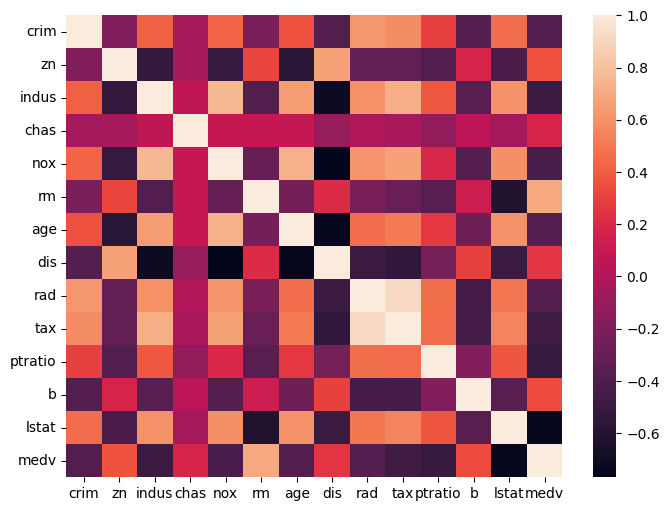

In [ ]:
sns.heatmap(corr)

In [ ]:
X = housing_dataset.drop(["medv"], axis = 1)
y = housing_dataset.filter(["medv"], axis = 1)

In [ ]:
X.head()
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
house_predictor = LinearRegression()
house_predictor.fit(X_train, y_train)
y_pred = house_predictor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.189091965887837
Mean Squared Error: 24.291119474973478
Root Mean Squared Error: 4.928602182665332


In [ ]:
comparison_df = pd.DataFrame({'Actual' : y_test.values.tolist(), 'Predicted' : y_pred.tolist()})
comparison_df


,Actual,Predicted
0,[23.6],[28.996723619824937]
1,[32.4],[36.02556533567226]
2,[13.6],[14.816944045388151]
3,[22.8],[25.031979150399454]
4,[16.1],[18.76987991524816]
...,...,...
97,[17.9],[-0.16423699568657568]
98,[9.6],[13.68486681528589]
99,[17.2],[16.183596971713442]
100,[22.5],[22.276219993533406]


In [ ]:
print (house_predictor.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [ ]:
X_test.values[1].shape

(13,)

In [ ]:
single_point = X_test.values[1].reshape(1,-1)
single_point.shape

(1, 13)

In [ ]:
house_predictor.predict(X_test.values[1].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36.02556534]])

In [ ]:
y_test.values[1]


array([32.4])

Here Predicted value is 324,000 but the price should be 320000 so there is a deviation of 4000.